MA0218 Exercise 4
=================

**Author:** Hankertrix




# Table of Contents







## Solutions



### Problem 1



Import the required libraries.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Set the default seaborn style for graphics
sb.set_theme()

Load the data.



In [2]:
house_data = pd.read_csv("train.csv")

print(house_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

Extract the required data.



In [3]:
house_gr_liv_area = house_data["GrLivArea"]
house_sale_price = house_data["SalePrice"]

#### (a)



Plot a joint plot of `house_sale_price` against `house_gr_liv_area`.



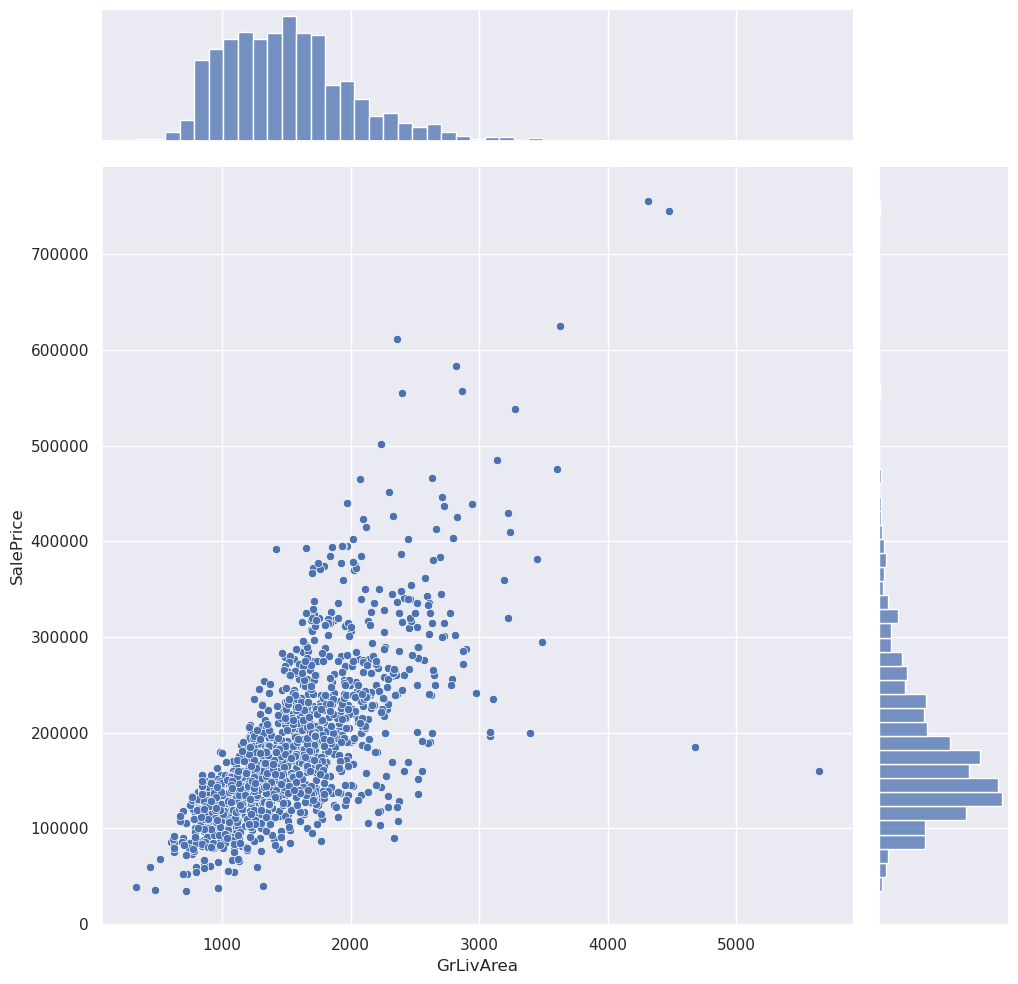

In [4]:
sb.jointplot(x=house_gr_liv_area, y=house_sale_price, height=10)

Print the correlation of `house_sale_price` and `house_gr_liv_area`.



In [5]:
print(house_sale_price.corr(house_gr_liv_area))

0.7086244776126511


#### (b)



Import the linear regression model from `scikit-learn`.



In [6]:
from sklearn.linear_model import LinearRegression

#### (c)



Partition the data sets into a training data set with 1100 rows, and a testing data set with 360 rows.



In [7]:
# Training data sets
house_gr_liv_area_train = pd.DataFrame(house_gr_liv_area[:1100])
house_sale_price_train = pd.DataFrame(house_sale_price[:1100])

# Testing data sets
house_gr_liv_area_test = pd.DataFrame(house_gr_liv_area[1100:1100 + 360])
house_sale_price_test = pd.DataFrame(house_sale_price[1100:1100 + 360])

Check whether the data is of the right size.



In [8]:
for data in (
        house_gr_liv_area_train,
        house_sale_price_train,
        house_gr_liv_area_test,
        house_sale_price_test,
):
    print(len(data))

1100
1100
360
360


#### (d)



Create the linear regression object.



In [9]:
linear_regression_obj = LinearRegression()

Train the linear regression model using the training data set.



In [10]:
linear_regression_obj.fit(house_gr_liv_area_train, house_sale_price_train)

LinearRegression()

#### (e)



Print the coefficients of the linear regression model.



In [11]:
print(linear_regression_obj.coef_)

[[113.88950443]]


Create the formula for the linear regression model.



In [12]:
linear_regression_x = house_gr_liv_area_train
linear_regression_y = linear_regression_obj.coef_ * linear_regression_x + linear_regression_obj.intercept_

Plot the linear regression line.



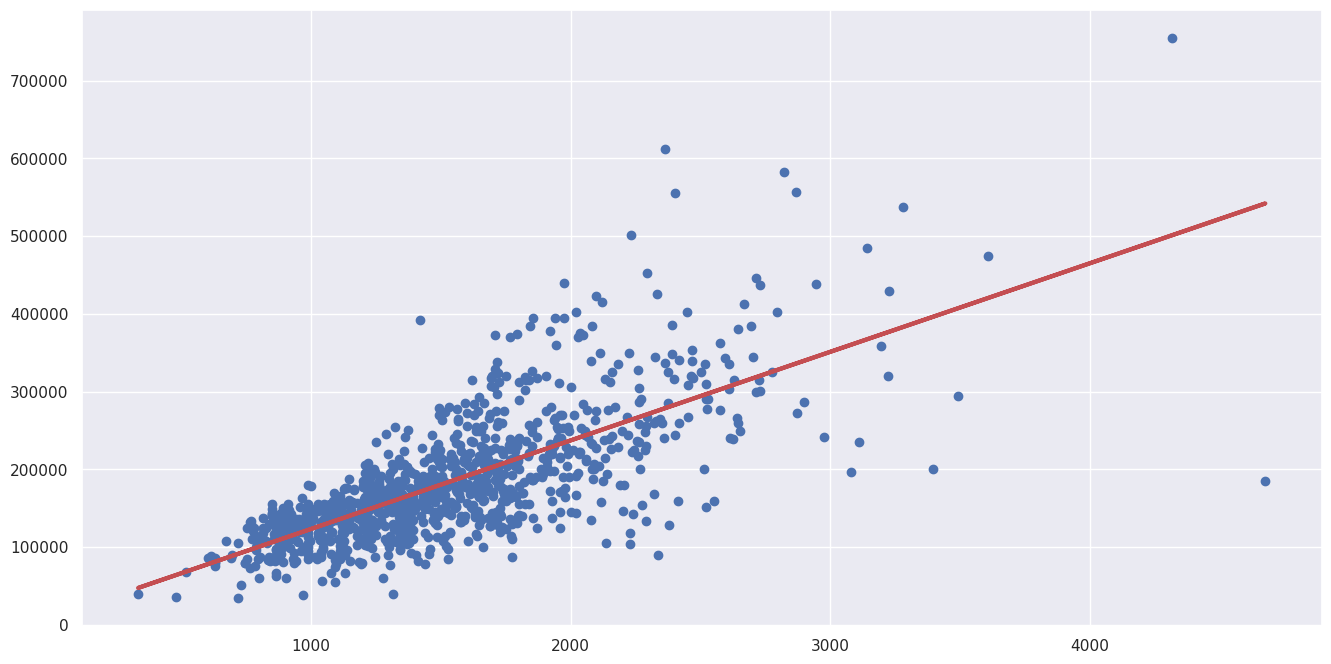

In [13]:
figure = plt.figure(figsize=(16, 8))
plt.scatter(house_gr_liv_area_train, house_sale_price_train)
plt.plot(linear_regression_x, linear_regression_y, "r-", linewidth=3)

#### (f)



Predict the sale price using the test data set.



In [14]:
house_sale_price_prediction = linear_regression_obj.predict(house_gr_liv_area_test)

Plot a scatter plot of the predictions.



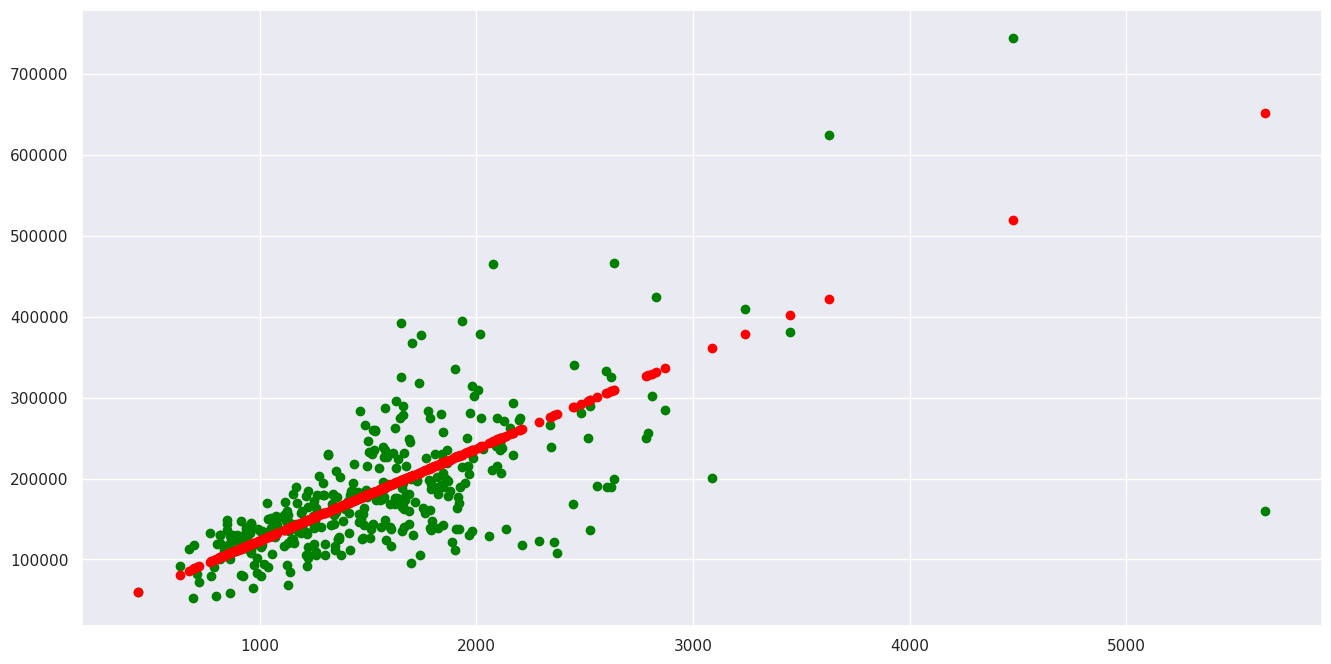

In [15]:
figure = plt.figure(figsize=(16, 8))
plt.scatter(house_gr_liv_area_test, house_sale_price_test, color="green")
plt.scatter(house_gr_liv_area_test, house_sale_price_prediction, color="red")

#### (g)



Get the explained variance (R<sup>2</sup>) of the model on both the training set and the test set.



In [16]:
explained_variance_train = linear_regression_obj.score(house_gr_liv_area_train, house_sale_price_train)
explained_variance_test = linear_regression_obj.score(house_gr_liv_area_test, house_sale_price_test)

print(f"Explained variance for training set: {explained_variance_train}")
print(f"Explained variance for testing set: {explained_variance_test}")

Explained variance for training set: 0.5317704755454566
Explained variance for testing set: 0.4011772000692575


The fit of the model isn't that great.



### Problem 2



Create the functions to do all steps in problem 1.



In [17]:
def linear_regression_pipeline(
        dependent_variable: str, independent_variables: list[str], data: pd.DataFrame
):
    """
    Function to go through all the steps of problem 1
    for all dependent variables.
    """

    # Get the data for the dependent variable
    dependent_variable_data = data[dependent_variable]

    # Create the training data set for the dependent variable
    # with 1100 rows
    dependent_variable_training_data = pd.DataFrame(dependent_variable_data[:1100])

    # Create the testing data set for the dependent variable
    # with 360 rows
    dependent_variable_test_data = pd.DataFrame(dependent_variable_data[-360:])

    # Iterate over all of the independent_variables
    for variable in independent_variables:
        #

        # Get the data for that variable
        variable_data = data[variable]

        # Plot the joint plot of the dependent
        # variable against the independent variable
        sb.jointplot(x=dependent_variable_data, y=variable_data, height=10)

        # Print the correlation between the dependent variable
        # and the independent variable
        print(
            f"Correlation between {dependent_variable} and {variable}:",
            dependent_variable_data.corr(variable_data)
        )

        # Create the training data set for the dependent variable
        # with 1100 rows
        variable_training_data = pd.DataFrame(variable_data[:1100])

        # Create the testing data set for the dependent variable
        # with 360 rows
        variable_test_data = pd.DataFrame(variable_data[-360:])

        # Create the linear regression model
        linear_regression_model = LinearRegression()

        # Fit the linear regression model using the training data set
        linear_regression_model.fit(
            variable_training_data, dependent_variable_training_data
        )

        # Get the model coefficient
        linear_regression_model_coefficient = linear_regression_model.coef_[0][0]

        # Print the coefficient of the linear regression model
        print(
            f"Linear regression coefficient for {dependent_variable} vs {variable}:",
            linear_regression_model_coefficient
        )

        # Create the formula for the linear regression model
        linear_regression_x = variable_training_data
        linear_regression_y = (
            linear_regression_model.coef_ * linear_regression_x
            + linear_regression_model.intercept_
        )

        # Plot the linear regression line on the data,
        # which is plotted using a scatter plot
        _ = plt.figure(figsize=(16, 8))
        plt.scatter(variable_training_data, dependent_variable_training_data)
        plt.plot(linear_regression_x, linear_regression_y, "r-", linewidth=3)

        # Predict the dependent variable using the test data set
        model_prediction = linear_regression_model.predict(variable_test_data)

        # Plot a scatter plot for the predictions
        _ = plt.figure(figsize=(16, 8))
        plt.scatter(variable_test_data, dependent_variable_test_data, color="green")
        plt.scatter(variable_test_data, model_prediction, color="red")

        # Print the explained variance of the model on the training data set
        training_explained_variance = linear_regression_model.score(
            variable_training_data, dependent_variable_training_data
        )
        print(
            "Explained variance for training set",
            f"for {dependent_variable} vs {variable}:",
            training_explained_variance,
        )

        # Print the explained variance of the model on the test data set
        test_explained_variance = linear_regression_model.score(
            variable_test_data, dependent_variable_test_data
        )
        print(
            "Explained variance for testing set",
            f"for {dependent_variable} vs {variable}:",
            test_explained_variance,
        )

Create the list of independent variables needed.



In [18]:
independent_variables = [
    "LotArea",
    "TotalBsmtSF",
    "GarageArea",
]

Call the function to do the linear regression pipeline on all the independent variables above.



Correlation between SalePrice and LotArea: 0.2638433538714062
Linear regression coefficient for SalePrice vs LotArea: 1.9188124184063218
Explained variance for training set for SalePrice vs LotArea: 0.06996047063721689
Explained variance for testing set for SalePrice vs LotArea: 0.06617868448896169
Correlation between SalePrice and TotalBsmtSF: 0.6135805515591944
Linear regression coefficient for SalePrice vs TotalBsmtSF: 120.1997955853062
Explained variance for training set for SalePrice vs TotalBsmtSF: 0.4096515413342241
Explained variance for testing set for SalePrice vs TotalBsmtSF: 0.2630537869934424
Correlation between SalePrice and GarageArea: 0.6234314389183598
Linear regression coefficient for SalePrice vs GarageArea: 241.42776434282948
Explained variance for training set for SalePrice vs GarageArea: 0.4052658994757937
Explained variance for testing set for SalePrice vs GarageArea: 0.3341589488914384


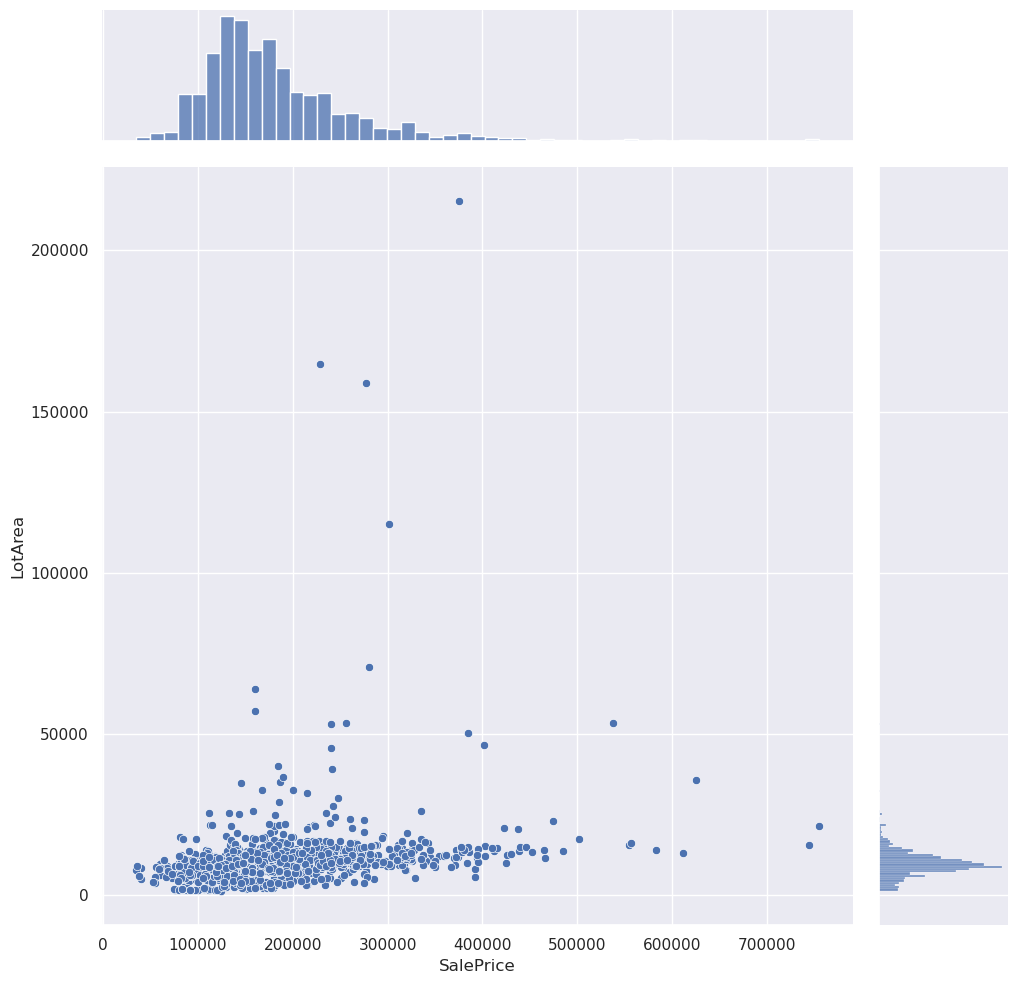

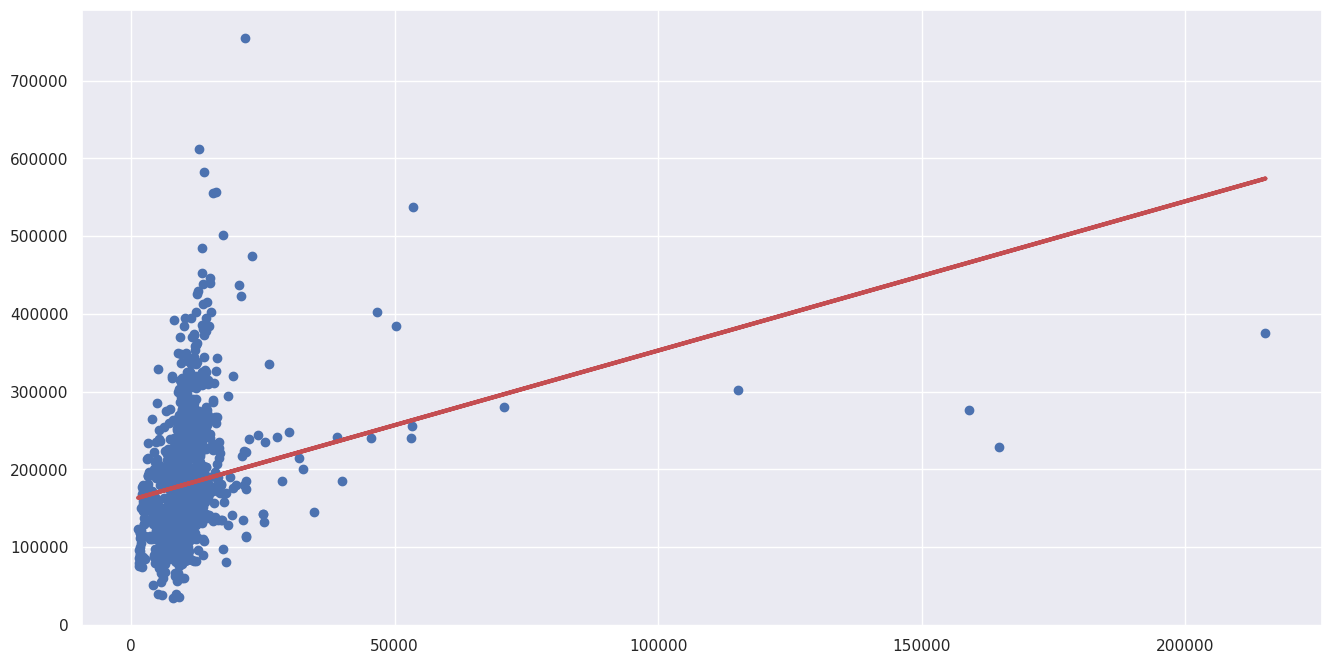

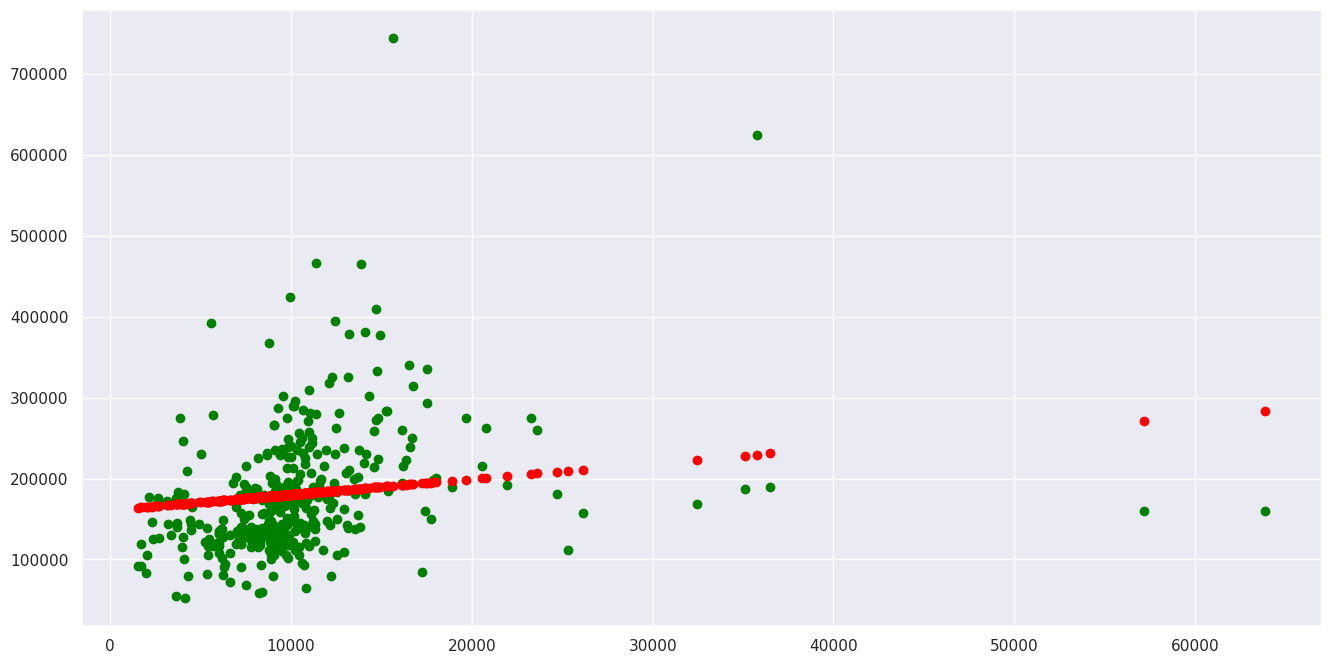

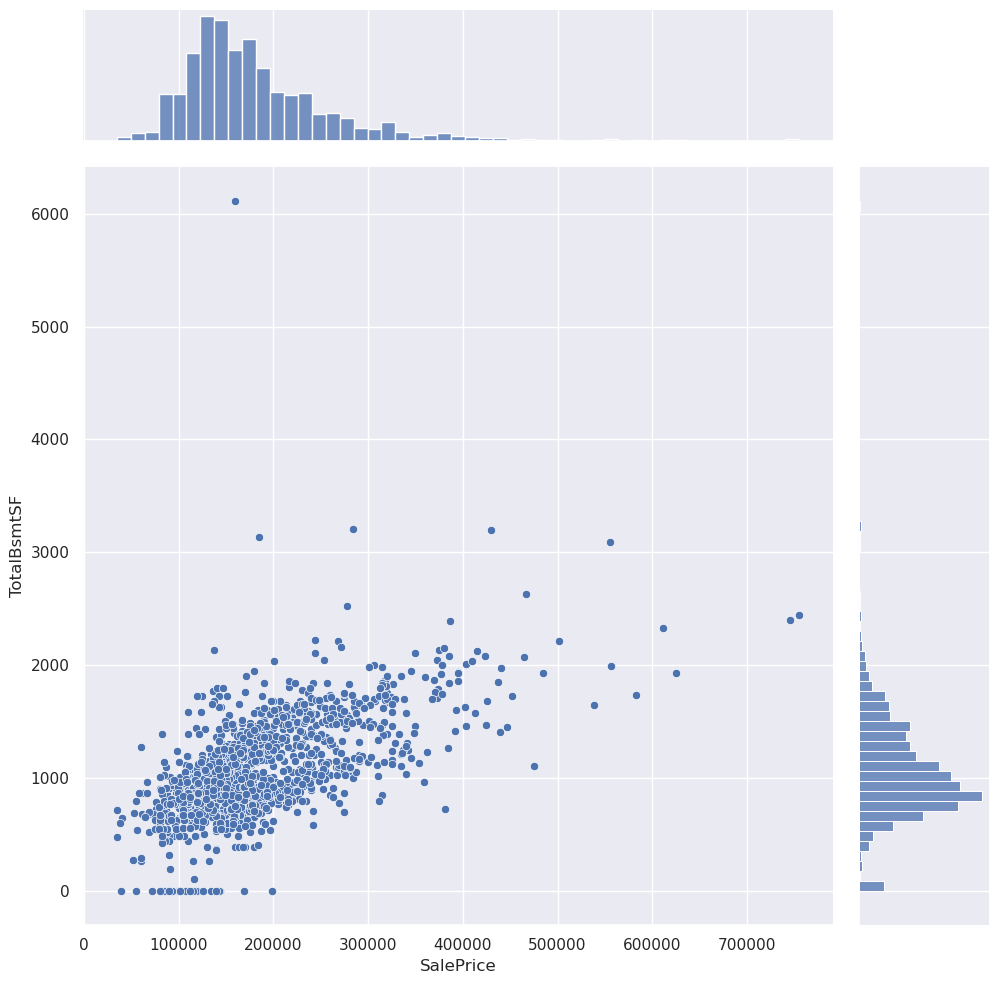

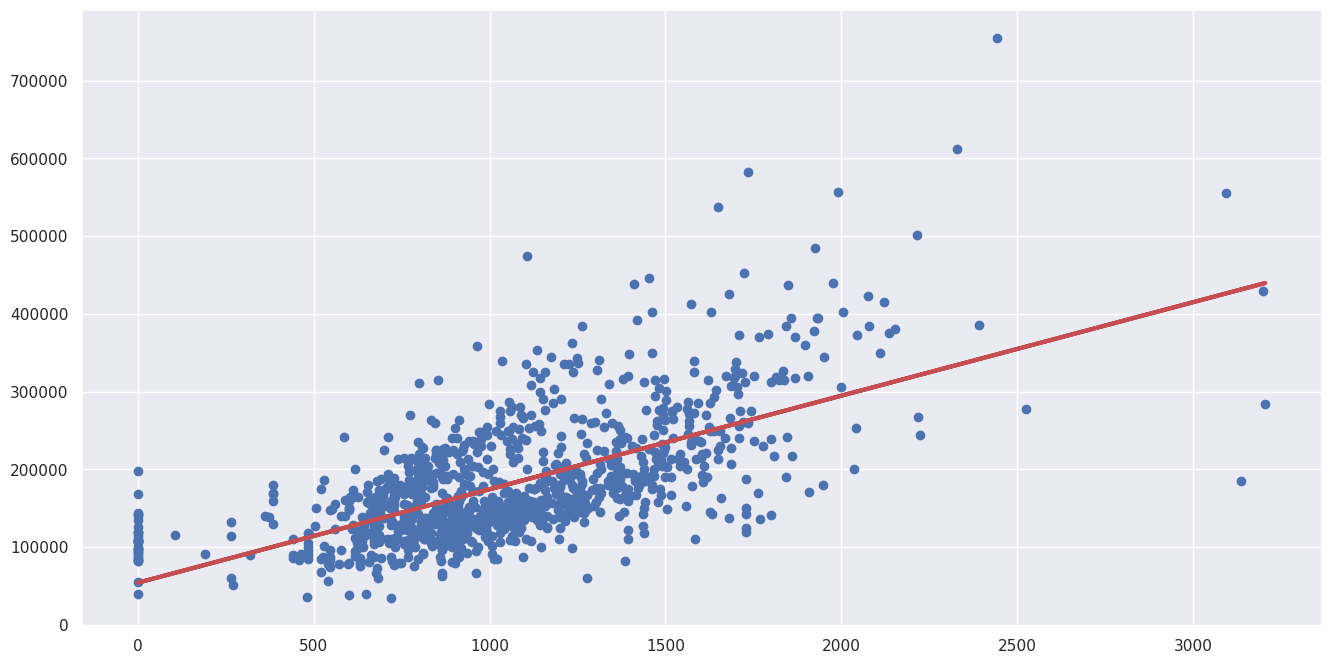

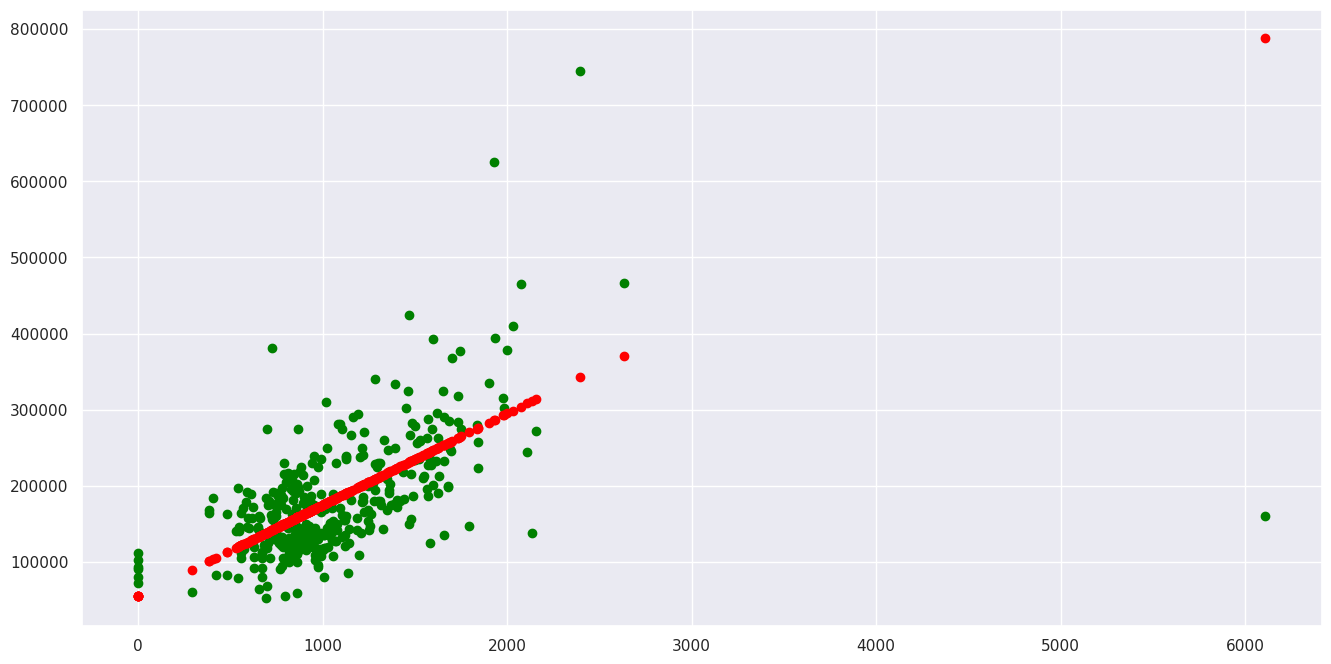

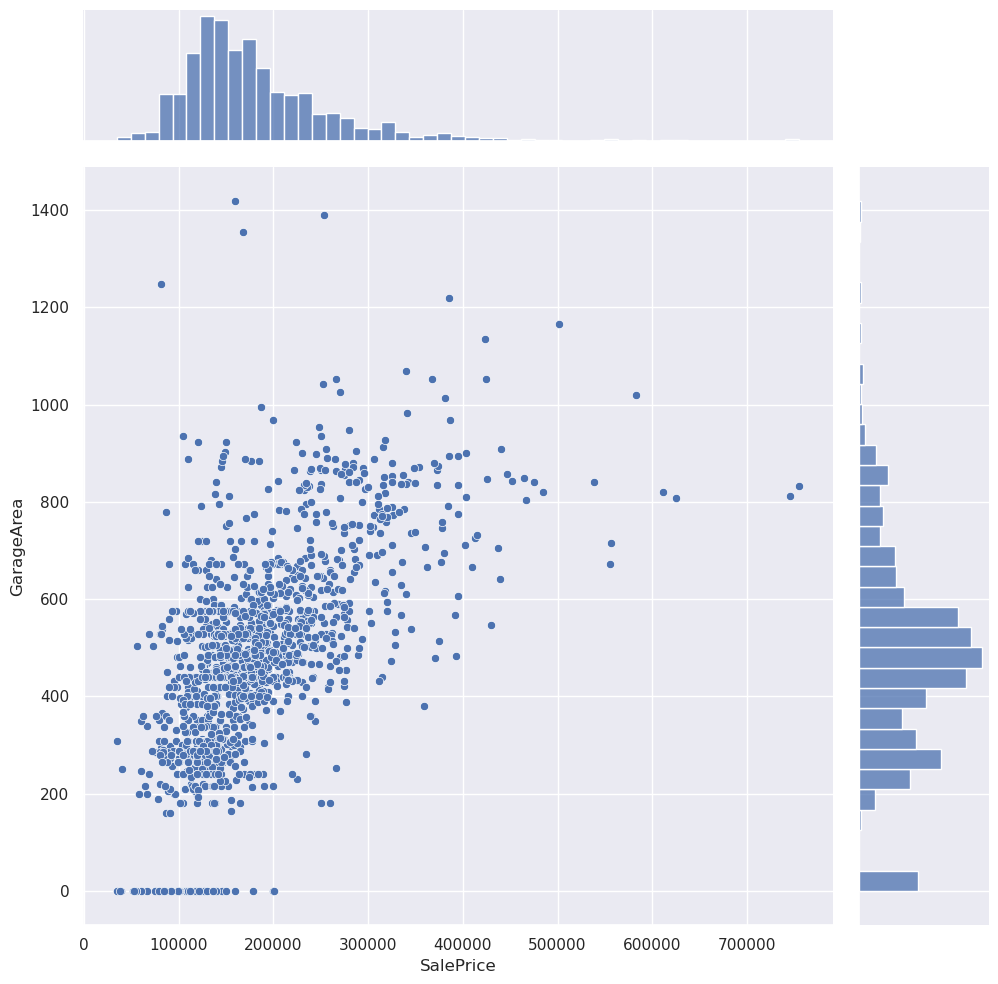

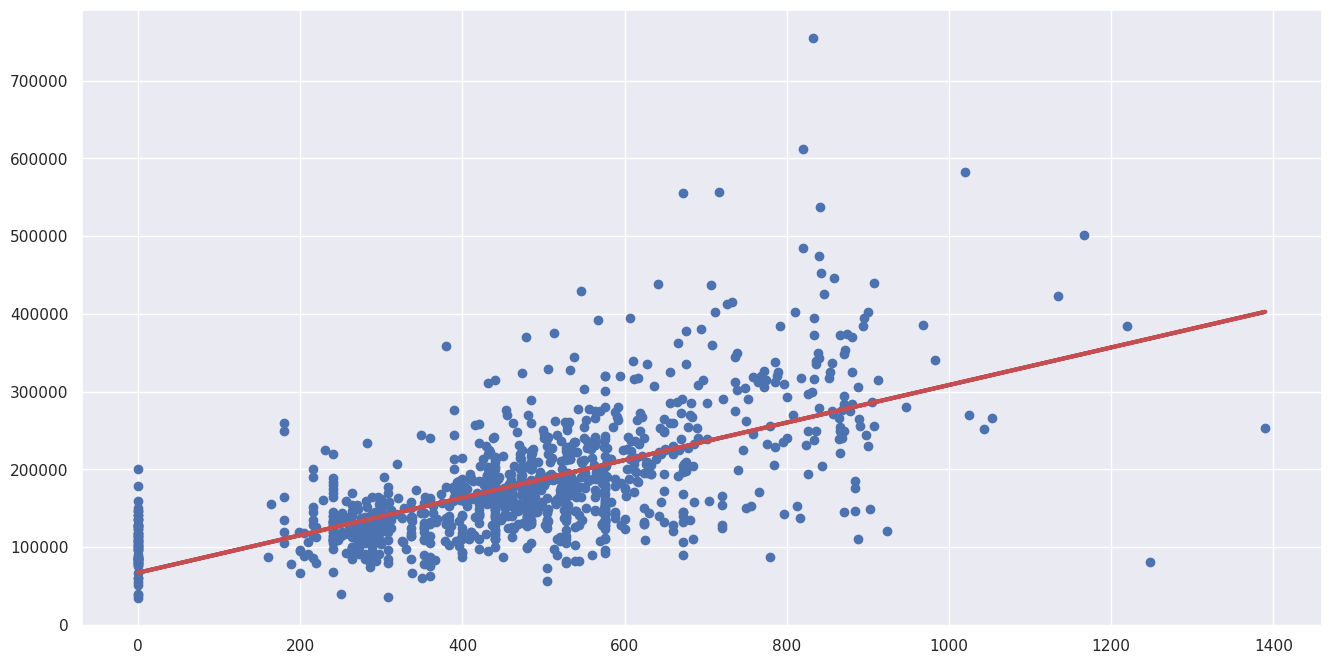

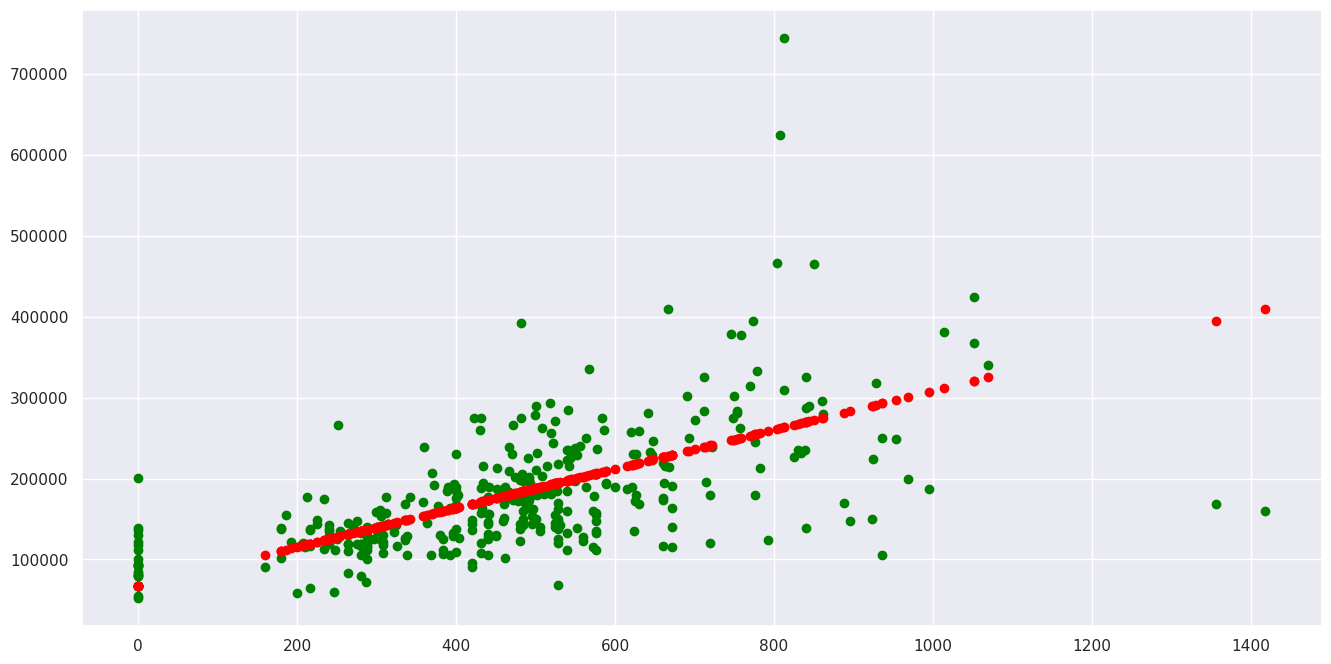

In [19]:
linear_regression_pipeline("SalePrice", independent_variables, house_data)

From the results above, it seems that `GrLivArea` is still the best predictor of sale price, with the highest explained variance (R<sup>2</sup>) and correlation. The rest of the variables have a lower explained variance value, but are still useful in predicting sale price, except for `LotArea`, which has a very low correlation and explained variance value.

